# Q4

import the libraries

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

read both images and plot them

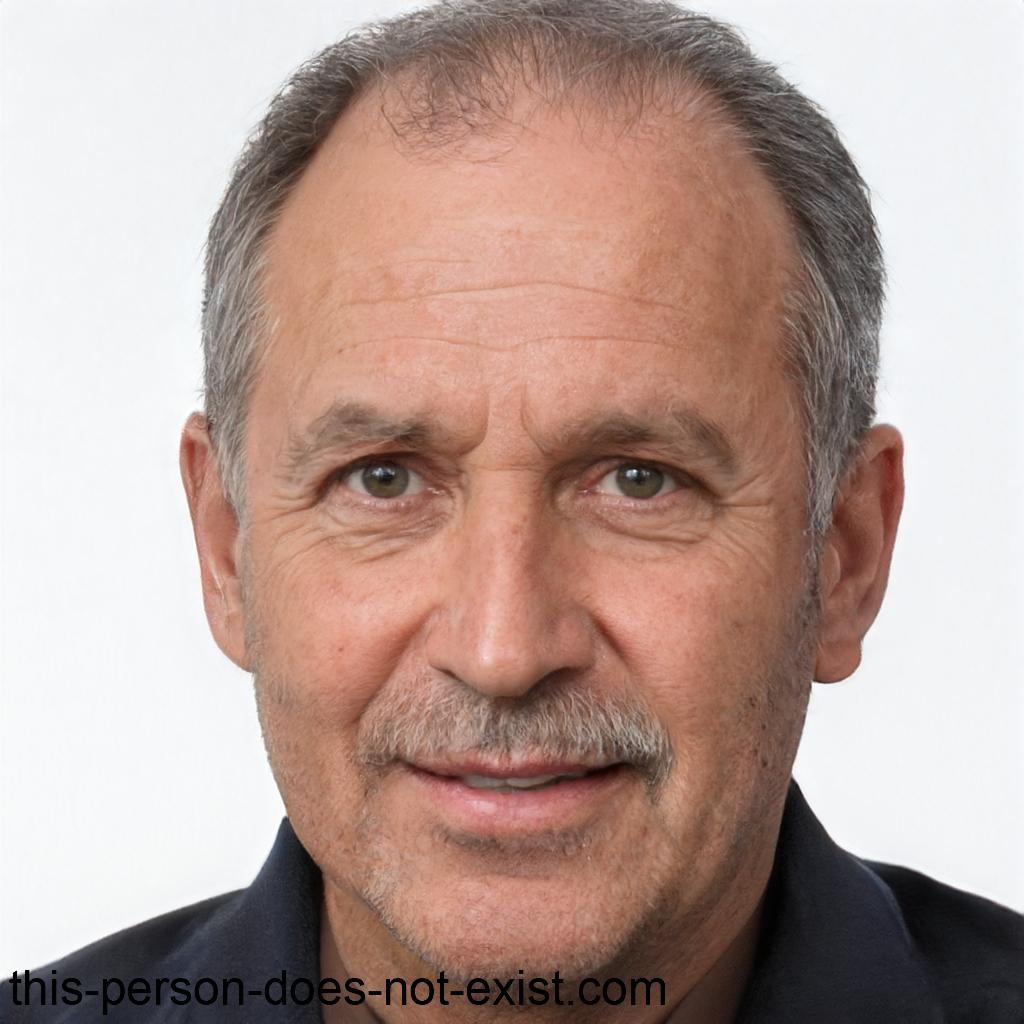

In [2]:
grandpa_image = cv2.imread('/content/q4_grandpa.jpeg')

cv2_imshow(grandpa_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

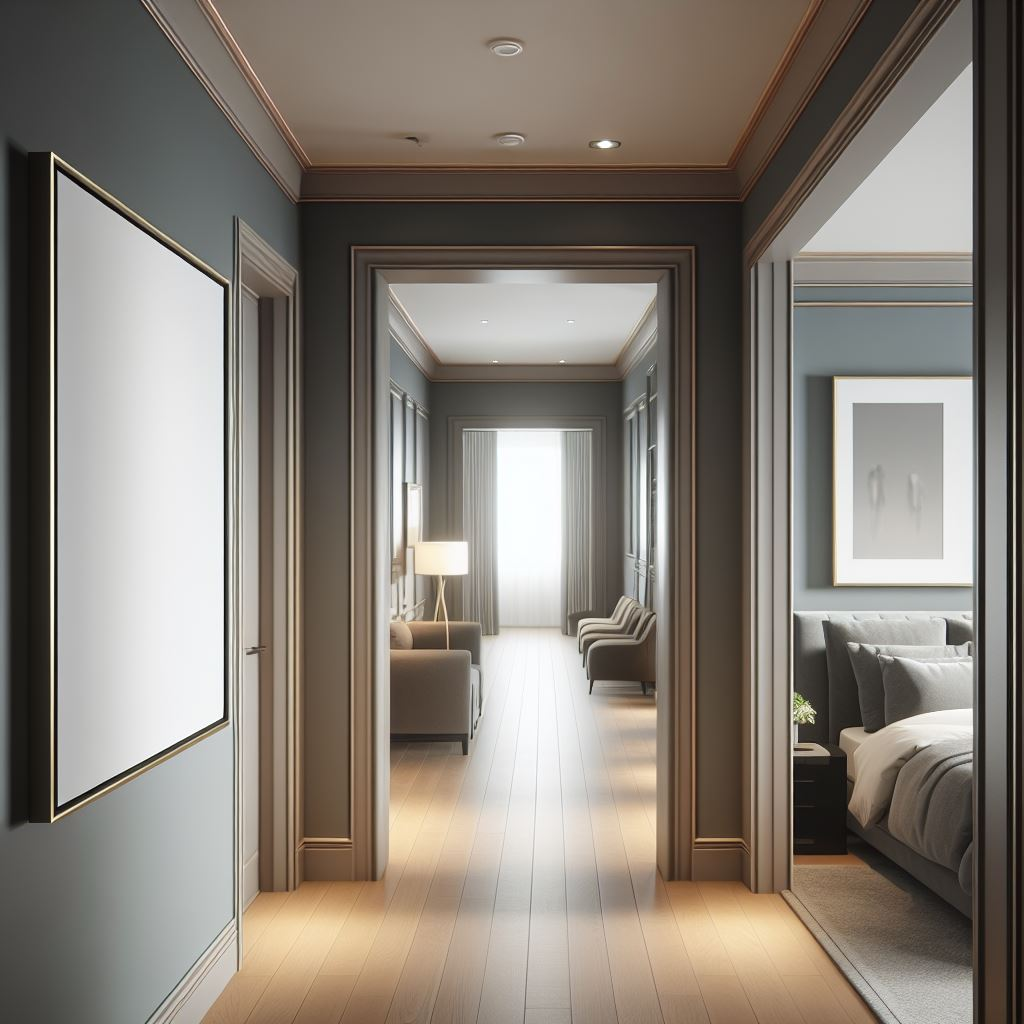

In [3]:
room_image = cv2.imread('/content/q4_room.jpeg')

cv2_imshow(room_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

add black ribbon to grandpa image

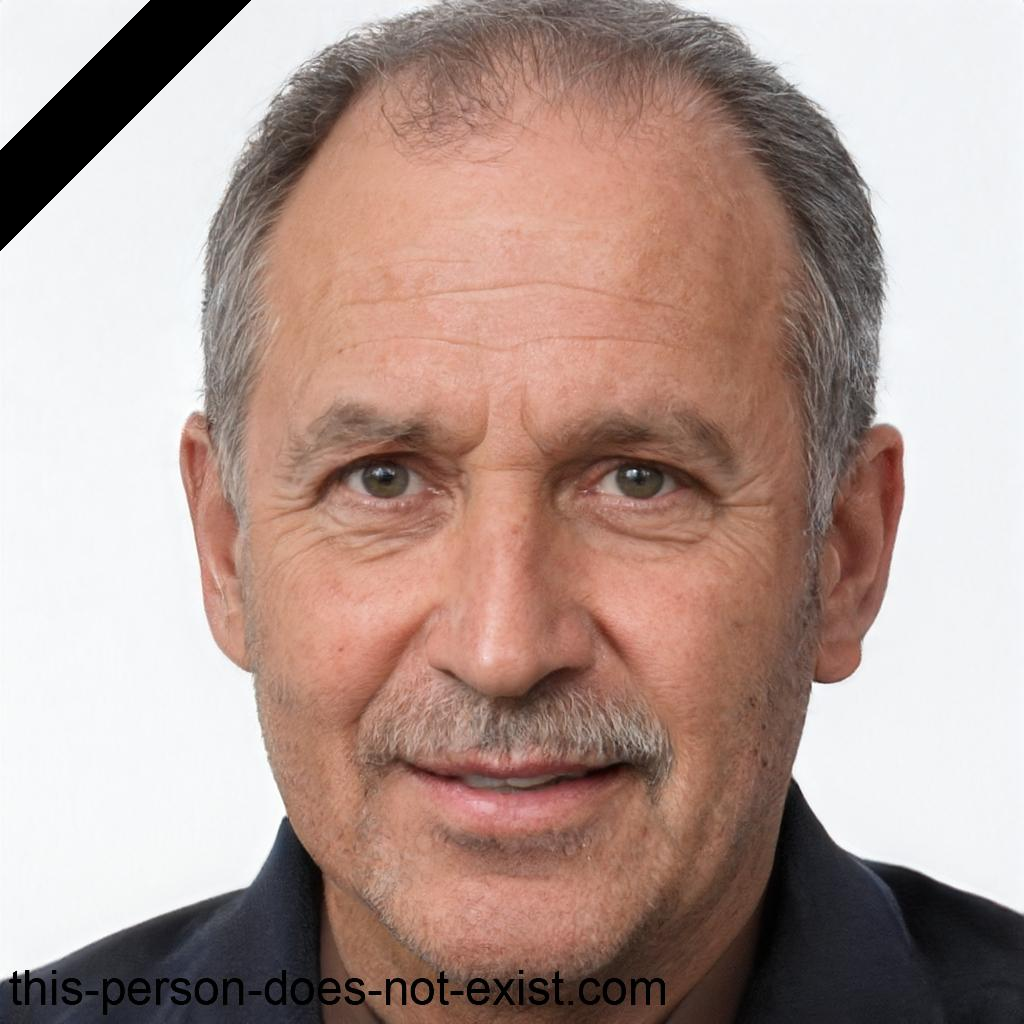

In [4]:
# Create a black ribbon mask
ribbon_mask = np.zeros_like(grandpa_image[:, :, 0], dtype=np.uint8)

# Define the vertices of the ribbon
ribbon_vertices = np.array([[250, 0], [150, 0], [0, 150], [0, 250]], np.int32)

# Fill the ribbon area in the mask with white color (255)
cv2.fillPoly(ribbon_mask, [ribbon_vertices], 255)

# Make the ribbon area black
grandpa_image[np.where(ribbon_mask == 255)] = [0, 0, 0]

# Display the modified image
cv2_imshow(grandpa_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

define the coordinates of destination image

get the transform matrix

apply the transform and plot the result

In [30]:
def project_image(grandpa_image, room_image, wall_points):
  # Get image dimensions
  grandpa_h, grandpa_w, _ = grandpa_image.shape
  room_h, room_w, _ = room_image.shape

  # Define the coordinates of grandpa_image
  source_points = np.float32([[0, 0], [grandpa_w, 0], [grandpa_w, grandpa_h], [0, grandpa_h]])

  # Define the coordinates on the wall in room_image
  destination_points = np.float32(wall_points)

  # Calculate homography matrix
  homography, _ = cv2.findHomography(source_points, np.float32(wall_points))

  # Perform perspective transform
  warped_image = cv2.warpPerspective(grandpa_image, homography, (room_w, room_h))

  # Add warped image to room image
  room_img = cv2.addWeighted(room_image, 1, warped_image, 1, 0)

  return room_img

In [27]:
room_image = cv2.imread('/content/q4_room.jpeg')

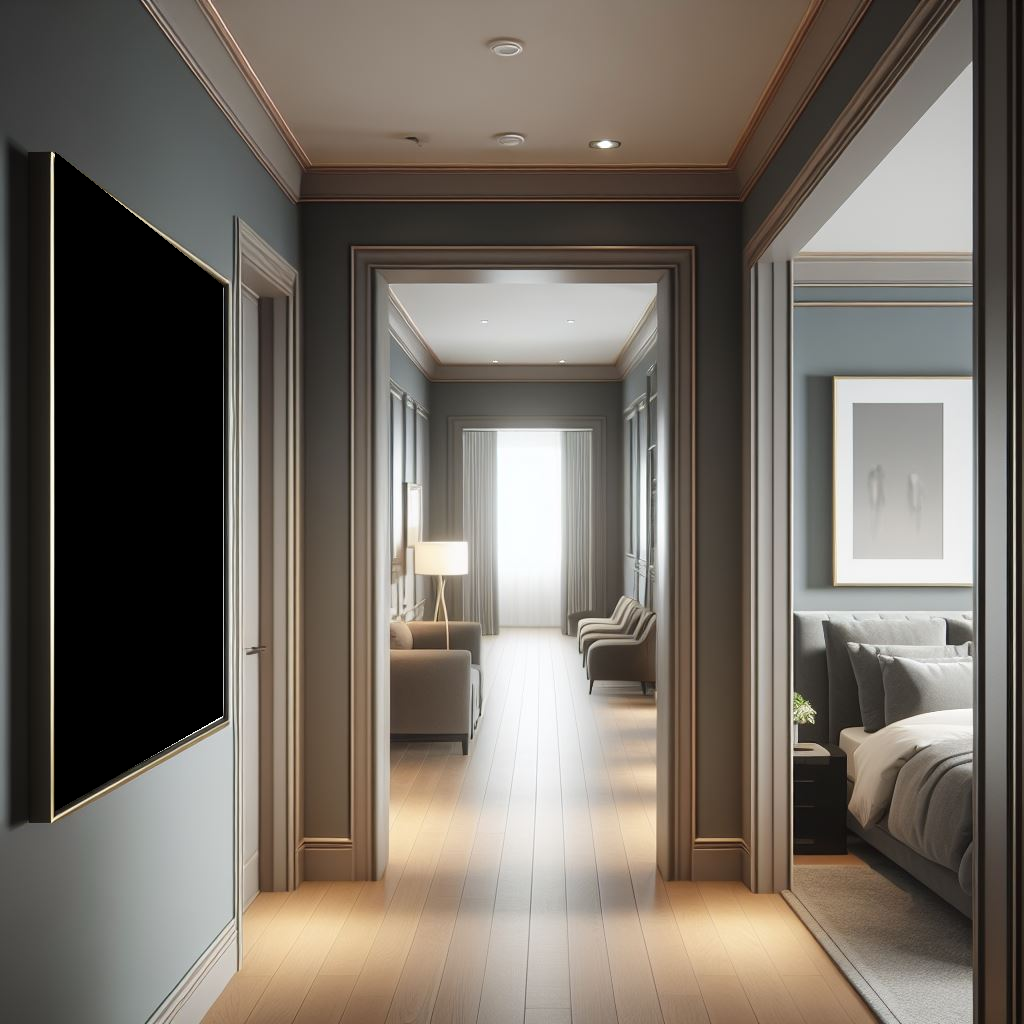

In [28]:
# Create a black mask
black_mask = np.zeros_like(room_image[:, :, 0], dtype=np.uint8)

# Define the vertices of the box
black_vertices = np.array([[222, 715], [222, 285], [55, 152], [55, 810]], np.int32)

# Fill the box area in the mask with white color (255)
cv2.fillPoly(black_mask, [black_vertices], 255)

# Make the box area black
room_image[np.where(black_mask == 255)] = [0, 0, 0]

# Display the modified image
cv2_imshow(room_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

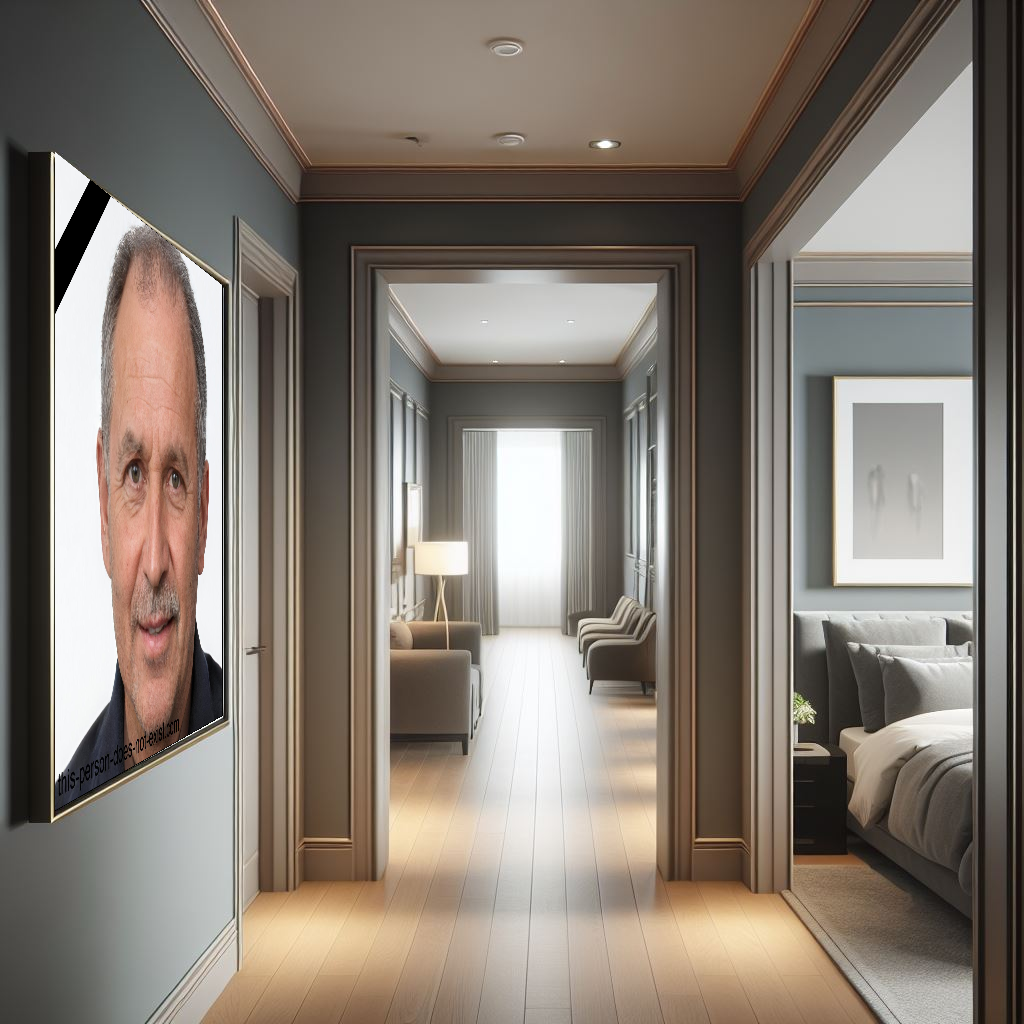

In [31]:
wall_points = [(55, 152), (222, 285), (222, 715), (55, 810)]
projected_image = project_image(grandpa_image, room_image, wall_points)

# Display or save the projected image
cv2_imshow(projected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()